# **1. Perkenalan Dataset**


## Dataset Overview

Dataset ini berisi informasi detail mengenai reservasi pelanggan hotel.  
Setiap baris merepresentasikan satu pemesanan (booking) dengan berbagai atribut yang mencakup karakteristik tamu, detail reservasi, hingga status pembatalan.

Dataset ini dapat digunakan untuk berbagai analisis, seperti:
- Prediksi pembatalan booking
- Analisis perilaku pelanggan
- Segmentasi pasar
- Optimasi harga dan layanan hotel

---

## Data Dictionary

- **Booking_ID**: Unique identifier untuk setiap booking  
- **no_of_adults**: Jumlah tamu dewasa  
- **no_of_children**: Jumlah anak-anak  
- **no_of_weekend_nights**: Jumlah malam akhir pekan (Sabtu atau Minggu)  
- **no_of_week_nights**: Jumlah malam hari kerja (Senin–Jumat)  
- **type_of_meal_plan**: Jenis paket makanan yang dipilih pelanggan  
- **required_car_parking_space**: Kebutuhan tempat parkir  
  - 0 = Tidak  
  - 1 = Ya  
- **room_type_reserved**: Tipe kamar yang dipesan (terenkripsi oleh INN Hotels)  
- **lead_time**: Jumlah hari antara tanggal pemesanan dan tanggal kedatangan  
- **arrival_year**: Tahun kedatangan  
- **arrival_month**: Bulan kedatangan  
- **arrival_date**: Tanggal kedatangan  
- **market_segment_type**: Jenis segmen pasar pelanggan  
- **repeated_guest**: Apakah pelanggan merupakan tamu yang pernah menginap sebelumnya  
  - 0 = Tidak  
  - 1 = Ya  
- **no_of_previous_cancellations**: Jumlah booking sebelumnya yang dibatalkan  
- **no_of_previous_bookings_not_canceled**: Jumlah booking sebelumnya yang tidak dibatalkan  
- **avg_price_per_room**: Rata-rata harga kamar per malam (dalam Euro)  
- **no_of_special_requests**: Jumlah permintaan khusus dari pelanggan  
- **booking_status**: Status booking (Canceled / Not Canceled)


Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
#Type your code here
df = pd.read_csv("../../Dataset-Raw/hotel_reservations.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
print(f"Shape: {df.shape}")
print(f"\nKolom: {df.columns.tolist()}")
print(f"\nMissing values: {df.isna().sum()}")
print(f"\nData Duplikat: {df.duplicated().sum()}")

Shape: (36275, 19)

Kolom: ['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'booking_status']

Missing values: Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
re

In [6]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


Distribusi Target

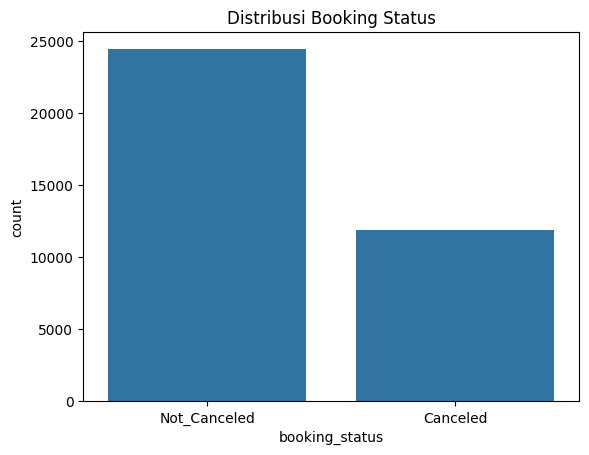

In [11]:
df['booking_status'].value_counts()
sns.countplot(x='booking_status', data=df)
plt.title('Distribusi Booking Status')
plt.show()


Mayoritas pelanggan tidak membatalkan booking mereka (sekitar dua kali lipat dibandingkan dibatalkan). Proporsi booking yang dibatalkan cukup besar, sehingga berpotensi memengaruhi pendapatan dan perencanaan perusahaan.

Distribusi FItur Kategori

C:\Users\Asus\AppData\Local\Temp\ipykernel_24660\2004693266.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
C:\Users\Asus\AppData\Local\Temp\ipykernel_24660\2004693266.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
C:\Users\Asus\AppData\Local\Temp\ipykernel_24660\2004693266.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
C:\Users\Asus\AppData\Local\Temp\ipykernel_24660\2004693266.py:13: FutureWarning: 

Passing `palette` with

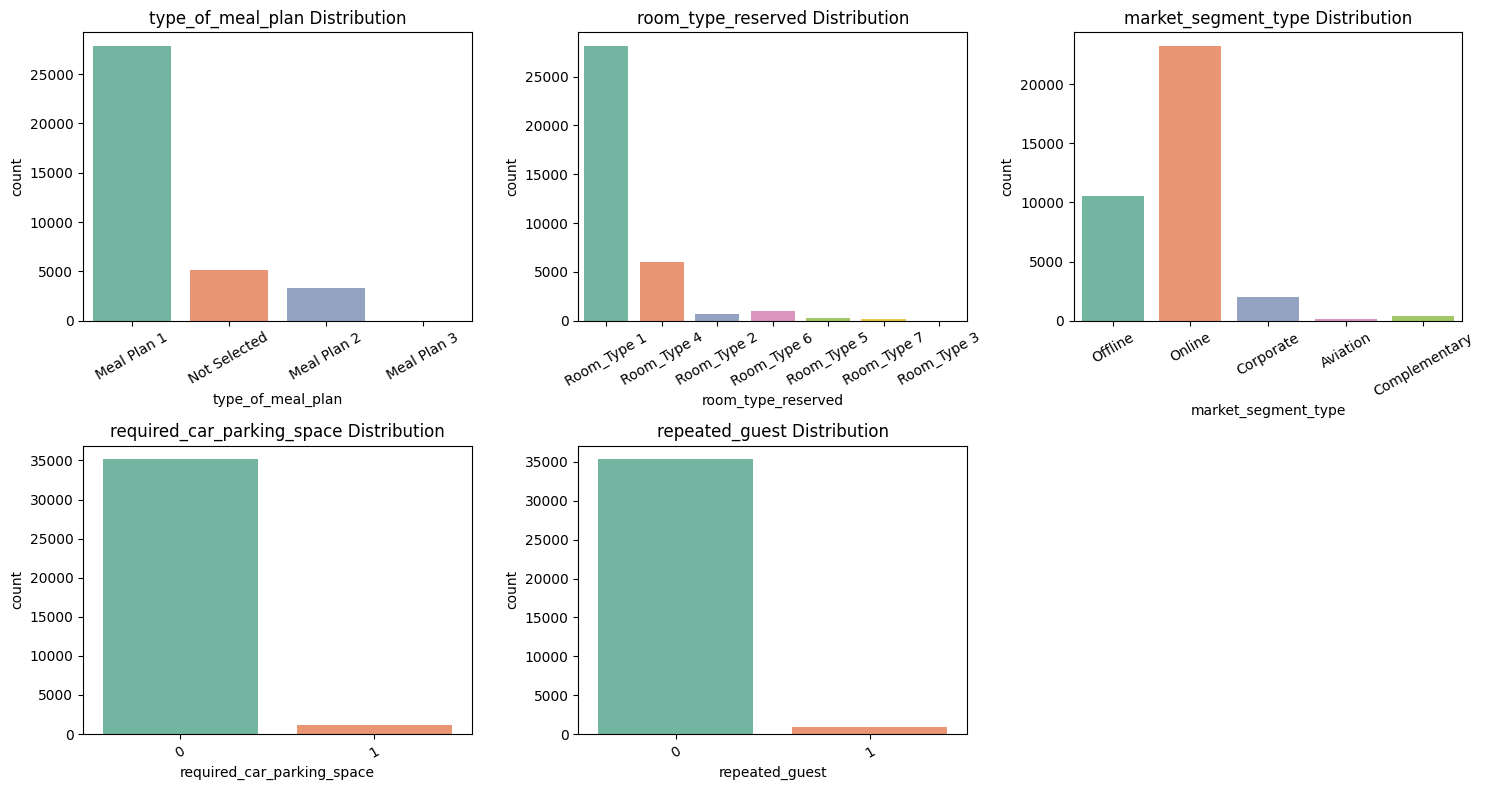

In [15]:

categorical_cols = [
    'type_of_meal_plan',
    'room_type_reserved',
    'market_segment_type',
    'required_car_parking_space',
    'repeated_guest'
]

plt.figure(figsize=(15,8))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()


- type_of_meal_plan
Mayoritas reservasi memilih Meal Plan 1, sementara kategori lainnya memiliki jumlah yang jauh lebih sedikit. Hal ini menunjukkan preferensi pelanggan yang terpusat pada satu jenis meal plan.

- room_type_reserved
Distribusi pemesanan kamar didominasi oleh Room_Type 1. Tipe kamar lainnya hanya digunakan oleh sebagian kecil reservasi, menunjukkan ketimpangan distribusi kategori.

- market_segment_type
Segmen pasar Online dan Offline mendominasi data, sedangkan segmen lain seperti Corporate dan Aviation memiliki proporsi yang relatif kecil.

- required_car_parking_space
Sebagian besar tamu tidak membutuhkan tempat parkir. Variabel ini bersifat biner dan memiliki distribusi yang sangat tidak seimbang.

- repeated_guest
Mayoritas tamu bukan merupakan pelanggan berulang. Informasi ini berpotensi penting dalam memprediksi pembatalan reservasi.

Distribusi Fitur Numerik

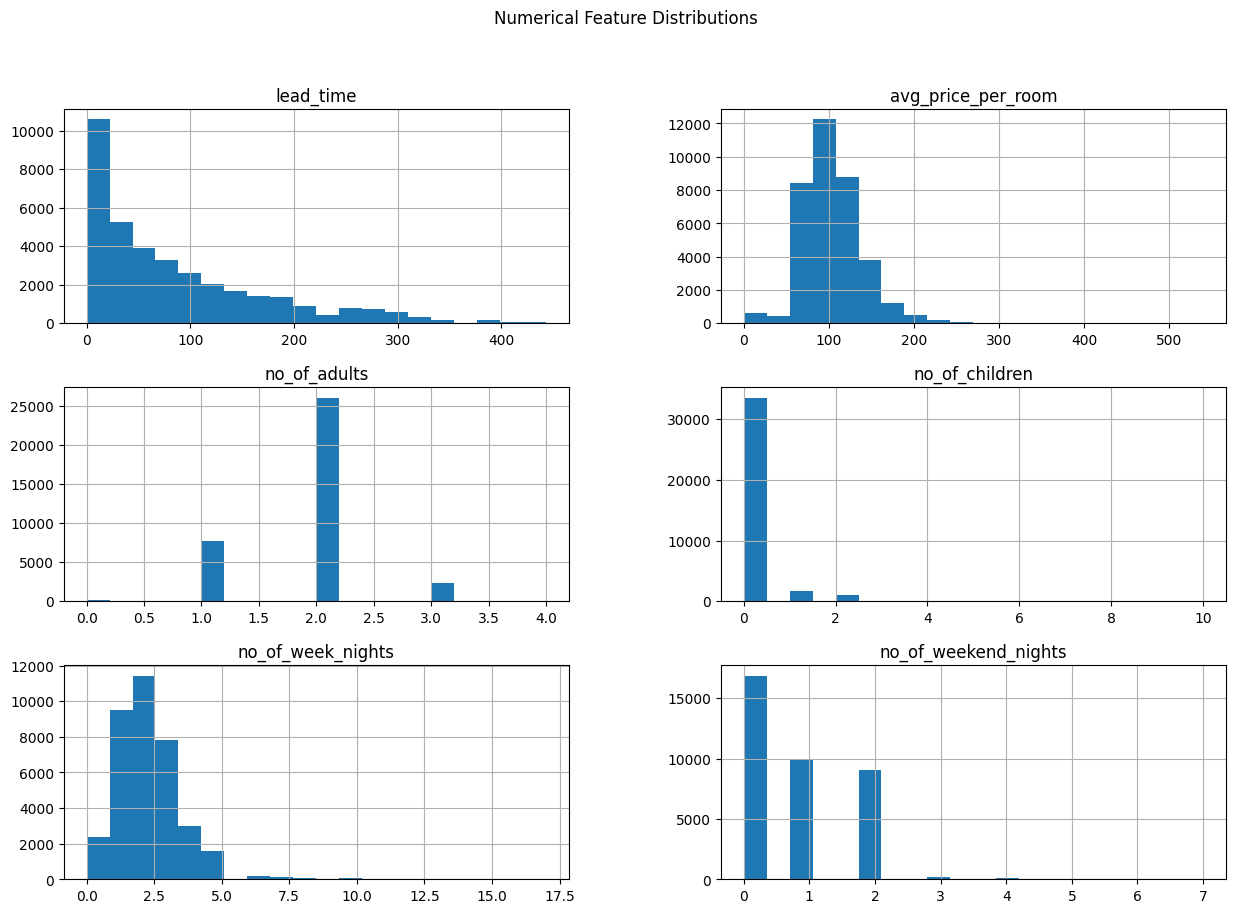

In [14]:
numerical_cols = [
    'lead_time',
    'avg_price_per_room',
    'no_of_adults',
    'no_of_children',
    'no_of_week_nights',
    'no_of_weekend_nights'
]

df[numerical_cols].hist(figsize=(15,10), bins=20)
plt.suptitle('Numerical Feature Distributions')
plt.show()


- lead_time
Distribusi condong ke kanan (right-skewed), menunjukkan sebagian besar reservasi dilakukan dengan jarak waktu yang pendek sebelum tanggal kedatangan, sementara sebagian kecil dilakukan jauh hari sebelumnya.

- avg_price_per_room
Distribusi relatif mendekati normal dengan konsentrasi harga pada rentang menengah, serta terdapat beberapa nilai ekstrem dengan harga yang lebih tinggi.

- no_of_adults
Mayoritas reservasi dilakukan untuk 2 orang dewasa, menunjukkan pola pemesanan yang didominasi oleh pasangan atau dua tamu.

- no_of_children
Sebagian besar reservasi tidak melibatkan anak-anak, dengan hanya sebagian kecil yang menyertakan satu atau lebih anak.

- no_of_week_nights
Lama menginap pada hari kerja umumnya berada pada rentang 1–3 malam, dengan sedikit reservasi berdurasi lebih panjang.

- no_of_weekend_nights
Mayoritas tamu menginap 0–2 malam pada akhir pekan, sementara durasi lebih panjang relatif jarang terjadi.

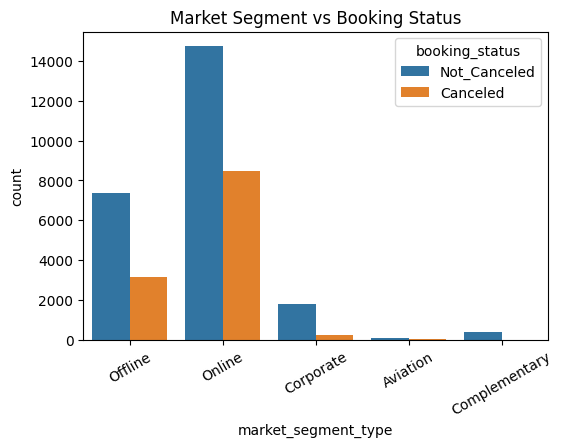

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='market_segment_type', hue='booking_status')
plt.title('Market Segment vs Booking Status')
plt.xticks(rotation=30)
plt.show()


### Market Segment vs Booking Status
Distribusi menunjukkan bahwa reservasi dari segmen Online dan Offline memiliki jumlah pembatalan yang lebih tinggi dibandingkan segmen lainnya. Segmen Online khususnya mendominasi baik reservasi yang dibatalkan maupun yang tidak dibatalkan. Sementara itu, segmen Corporate, Aviation, dan Complementary memiliki volume reservasi yang relatif kecil dengan tingkat pembatalan yang lebih rendah.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

Drop Kolom Target

In [17]:
df = df.drop(columns=['Booking_ID'])


Pisahkan Fitur dan Target

In [19]:
X = df.drop(columns=['booking_status'])
y = df['booking_status'].map({'Canceled': 1, 'Not_Canceled': 0})


Identifikasi Tipe Fitur

In [24]:
categorical_cols = [
    'type_of_meal_plan',
    'room_type_reserved',
    'market_segment_type'
]

binary_cols = [
    'required_car_parking_space',
    'repeated_guest'
]

numerical_cols = [
    'lead_time',
    'avg_price_per_room',
    'no_of_adults',
    'no_of_children',
    'no_of_week_nights',
    'no_of_weekend_nights',
    'arrival_month',
    'arrival_date',
    'no_of_previous_cancellations',
    'no_of_previous_bookings_not_canceled',
    'no_of_special_requests'
]


Encoding Kategorikal

In [29]:
X_encoded = pd.get_dummies(
    X,
    columns=categorical_cols,
    drop_first=True
)


Standarisasi Fitur Numerik

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_encoded[numerical_cols] = scaler.fit_transform(
    X_encoded[numerical_cols]
)

X_encoded.sample(15)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
16929,0.298893,-0.26147,-0.931190,-0.144803,0,-0.351829,2017,0.839242,-0.754777,0,...,False,False,False,False,False,False,False,False,False,True
24114,-1.628975,-0.26147,-0.931190,-0.853578,0,-0.572940,2018,0.839242,-0.297128,0,...,False,False,False,False,False,False,False,False,False,True
17293,0.298893,-0.26147,-0.931190,0.563972,0,-0.666040,2017,0.513493,1.533467,0,...,False,False,False,False,False,False,False,False,False,True
18040,0.298893,-0.26147,-0.931190,-0.853578,0,-0.433291,2018,0.513493,1.304643,0,...,False,False,False,False,False,False,False,False,False,True
8425,0.298893,-0.26147,0.217401,-0.144803,0,-0.258730,2018,-0.463753,0.503757,0,...,False,False,False,False,False,False,False,False,False,True
13044,0.298893,-0.26147,0.217401,-0.144803,0,-0.293642,2018,1.164990,0.274933,0,...,False,False,False,False,False,False,False,False,False,True
30483,0.298893,-0.26147,-0.931190,-0.853578,0,-0.025981,2017,0.513493,1.647879,0,...,False,False,False,False,False,False,False,False,True,False
20997,0.298893,-0.26147,1.365993,1.272747,0,1.021387,2017,0.839242,-0.068304,0,...,False,False,False,False,False,False,False,False,False,True
16560,2.226761,-0.26147,-0.931190,-0.853578,0,-0.980250,2018,-1.766747,1.190231,0,...,False,False,True,False,False,False,False,False,False,True
14269,-1.628975,-0.26147,-0.931190,-0.853578,0,-0.933701,2018,-0.789501,-0.640365,1,...,False,False,False,False,False,False,False,True,False,False


Split Data

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [32]:

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (36275, 17)
y shape: (36275,)
